In [1]:
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
from sklearn import datasets, cluster

%matplotlib inline
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from pylab import rcParams
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# needed imports
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

In [16]:
# this code loads the data
import pandas
phonecases = pandas.read_csv('phonecase.csv')
phonecases.head()
X = phonecases[["Age", "Income"]]
y = phonecases["Colour"]

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

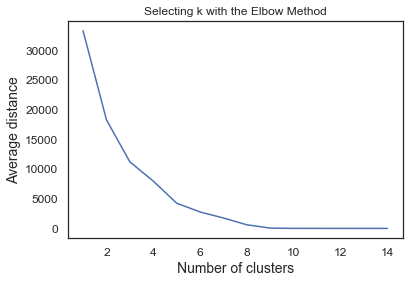

In [17]:
# k-means cluster analysis for 1-15 clusters                                              
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
clusters=range(1,15)
meandist=[]

# loop through each cluster and fit the model to the train set
# generate the predicted cluster assingment and append the mean 
# distance my taking the sum divided by the shape
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X)
    clusassign=model.predict(X)
    meandist.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1))
    / X.shape[0])
    
    
"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') 


In [18]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 15)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [19]:
from sklearn.metrics import silhouette_score
silhouette_score(X, model.labels_)
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

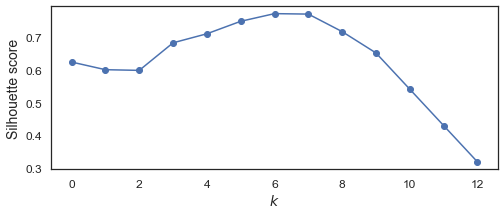

In [20]:
plt.figure(figsize=(8, 3))
plt.plot( silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

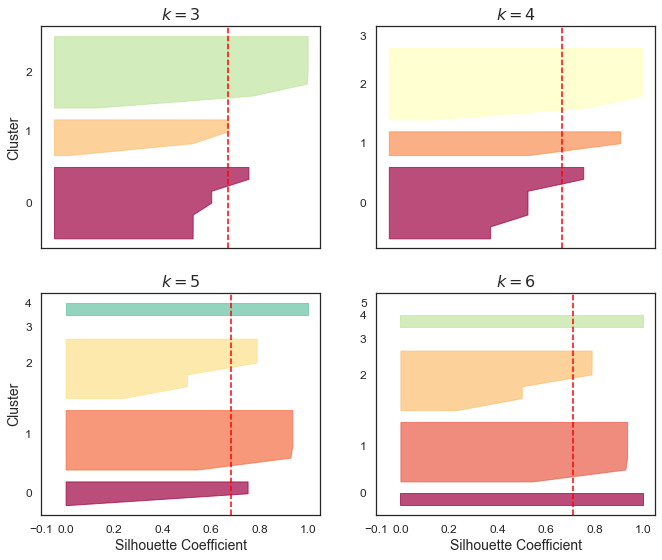

In [43]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

#save_fig("silhouette_analysis_plot")
plt.show()

as we observe for k=3 we have do not have the same size for the clusters but it is the best option of the 4

Hierarchical method

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, cophenet
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn.decomposition import PCA

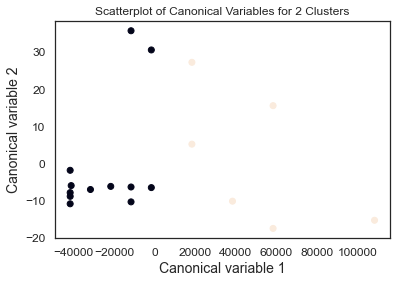

In [23]:
# Here we are just analyzing if we consider 2 cluster instead of 3 by using PCA 
model3=KMeans(n_clusters=2)
model3.fit(X) # has cluster assingments based on using 2 clusters
clusassign=model3.predict(X)
# plot clusters
''' Canonical Discriminant Analysis for variable reduction:
1. creates a smaller number of variables
2. linear combination of clustering variables
3. Canonical variables are ordered by proportion of variance accounted for
4. most of the variance will be accounted for in the first few canonical variables
'''
from sklearn.decomposition import PCA # CA from PCA function
pca_2 = PCA(2) # return 2 first canonical variables
plot_columns = pca_2.fit_transform(X) # fit CA to the train dataset
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,) 
# plot 1st canonical variable on x axis, 2nd on y-axis
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show() 
# close or overlapping clusters idicate correlated variables with low in-class variance 
# but not good separation. 2 cluster might be better.

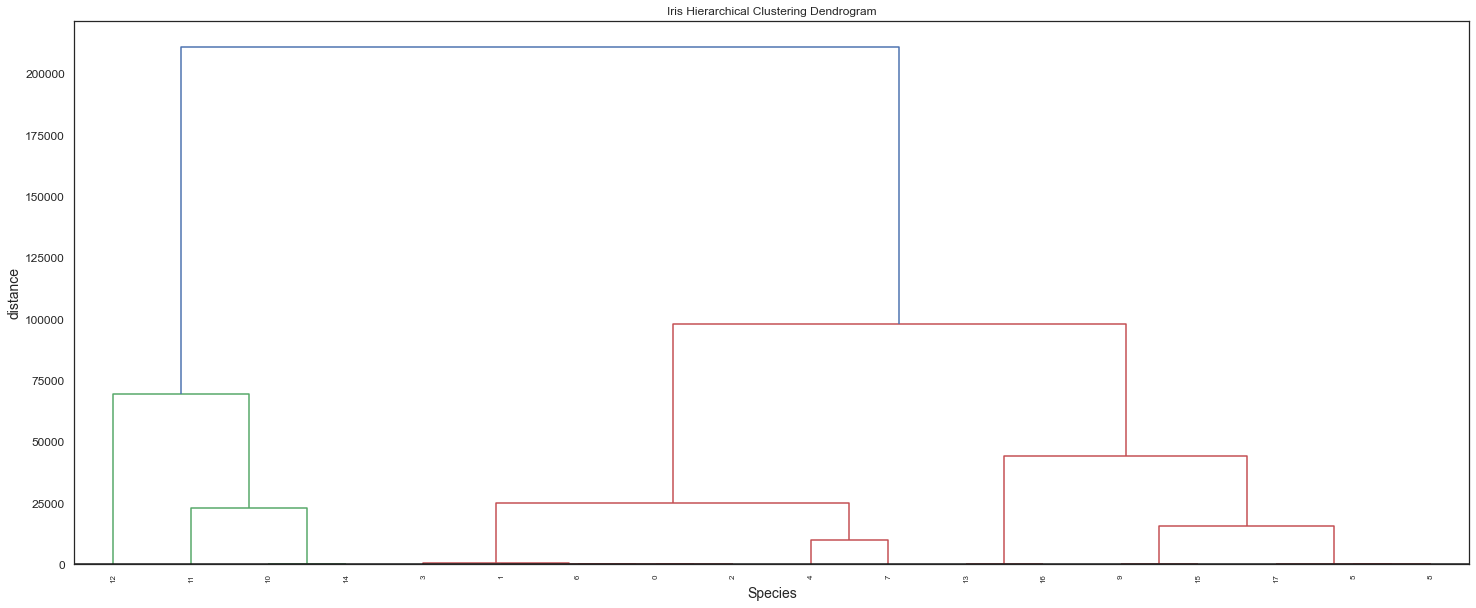

In [24]:
# calculate full dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
X = plot_columns
Z = linkage(X, 'ward')

# set cut-off to 150
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

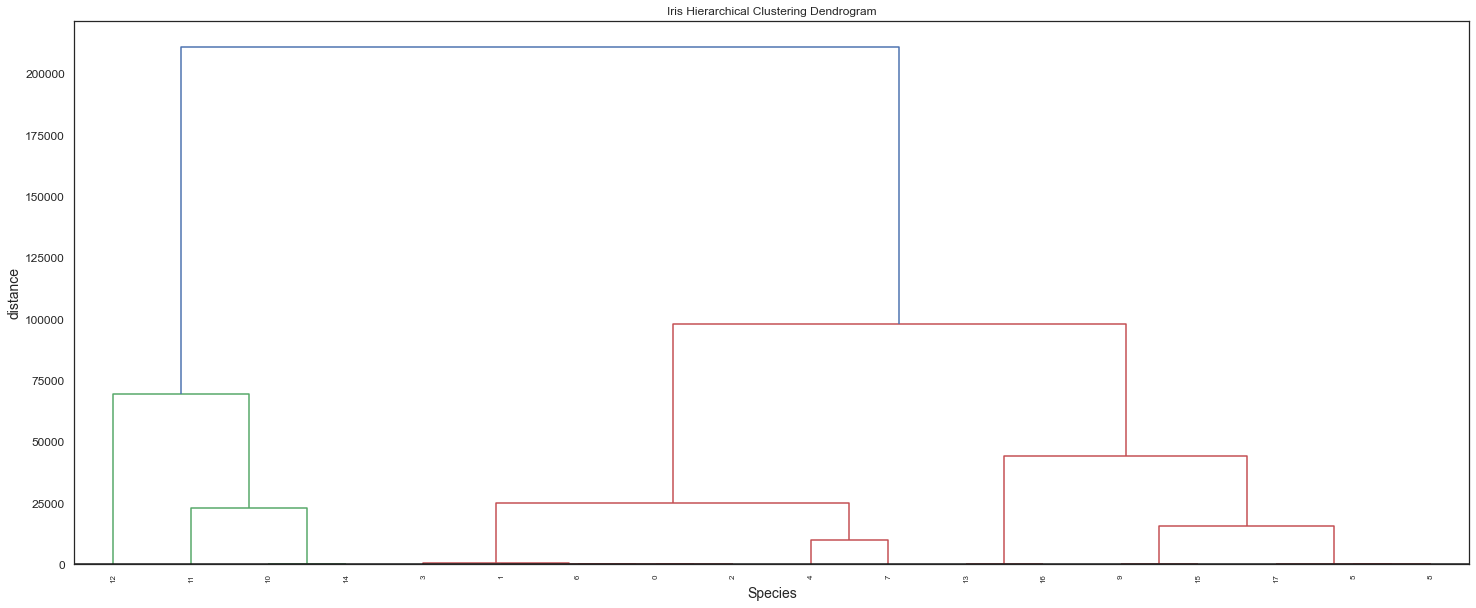

In [25]:
# calculate full dendrogram for 50
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(X, 'ward')

# set cut-off to 50
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=50,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

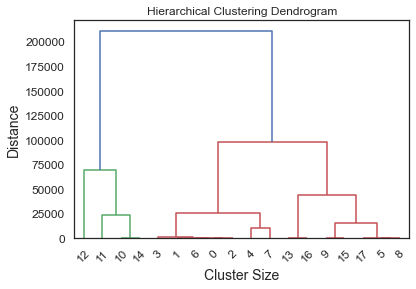

In [26]:
# generating the linkage matrix
Z=linkage(X,'ward')

# Plotting Dendogram
dendrogram(Z, leaf_rotation=45., leaf_font_size=12.)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.rcParams["figure.figsize"] = (14,6)
plt.show()

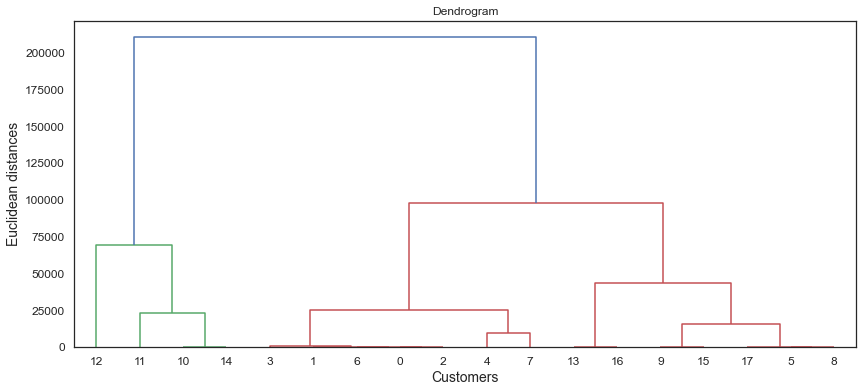

In [27]:
# Hierarchical Clustering

# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward' ))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Fitting the hierarchical clustering to the mall dataset

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
Y_hc = hc.fit_predict(X)

# Visualising the clusters

In [28]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
# generate the linkage matrix
Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))
c

0.8049085205119104

In [29]:
Z[0]

array([0., 2., 3., 2.])

In [31]:
Z[[5, 10, 15]]

array([[1.00000000e+01, 1.40000000e+01, 3.30000000e+01, 2.00000000e+00],
       [2.40000000e+01, 2.50000000e+01, 1.54919381e+04, 5.00000000e+00],
       [3.00000000e+01, 3.10000000e+01, 9.80780247e+04, 1.40000000e+01]])

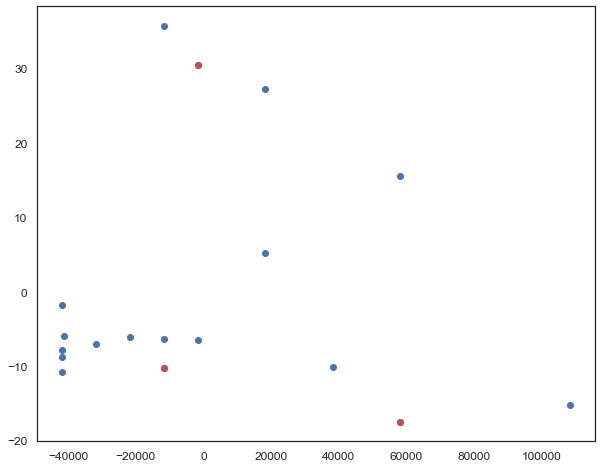

In [32]:
idxs = [5, 10, 15]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1])  # plot all points
plt.scatter(X[idxs,0], X[idxs,1], c='r')  # plot interesting points in red again
plt.show()

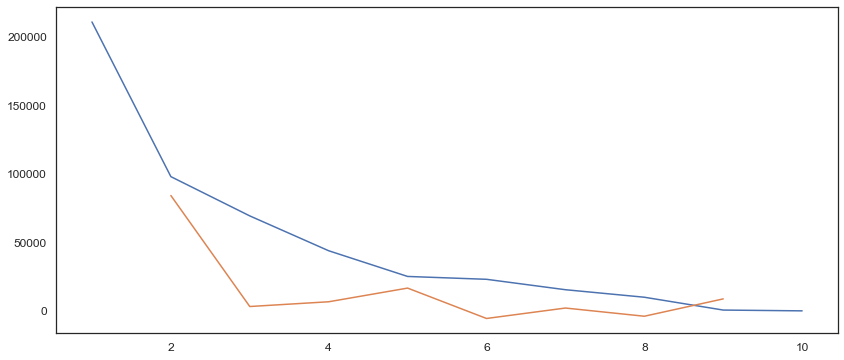

clusters: 2


In [33]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print ("clusters:", k)

In [38]:
from scipy.cluster.hierarchy import fcluster
k=2
fcluster(Z, k, criterion='maxclust')

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2], dtype=int32)

In [44]:
from scipy.cluster.hierarchy import fcluster
clusters =fcluster(Z, 2, depth=10)

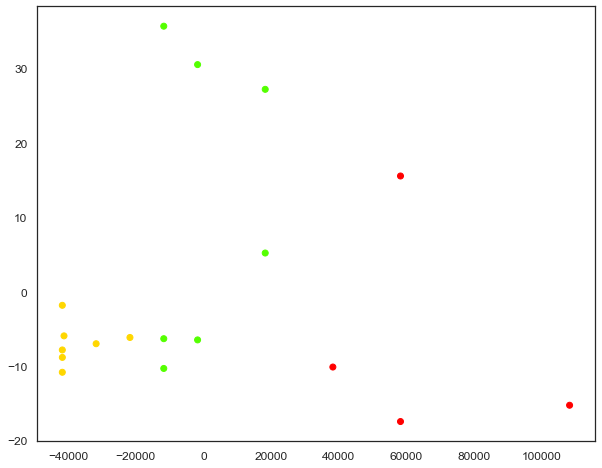

In [45]:
plt.figure(figsize=(10, 8))

plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

From the elbow plot we finally observe that k=5 is a good option but the best option is k=2